# Chapter 3. Neural network

퍼셉트론에서는 복잡한 함수를 표현할 수 있지만 가중치 설정 작업은 여전히 사람이 수동으로 한다.<br>
신경망, neural network 는 가중치 매개변수의 적절한 값을 데이터로부터 자동으로 학습하는 능력을 가진다.<br>
ch3 에서는 신경망이 데이터가 무엇인지 식별하는 처리 과정에 대해 알아본다.<br><br>
일반적으로 단순 퍼셉트론은 단층 네트워크에서 계단 함수를 활성 함수로 사용한 모델을 가르키고, 다층 퍼셉트론은 신경망을 가르킨다. 

In [31]:
import numpy as np
%matplotlib notebook
import matplotlib.pylab as plt

In [2]:
# step function
def step_function(x):
    ## general version
    #if x>0: return 1
    #else : return 0 
    ## numpy array support version
    y= x>0
    return y.astype(np.int)


In [5]:
x=np.array([-1.,1.,2.])
print(step_function(x))

[0 1 1]


<IPython.core.display.Javascript object>


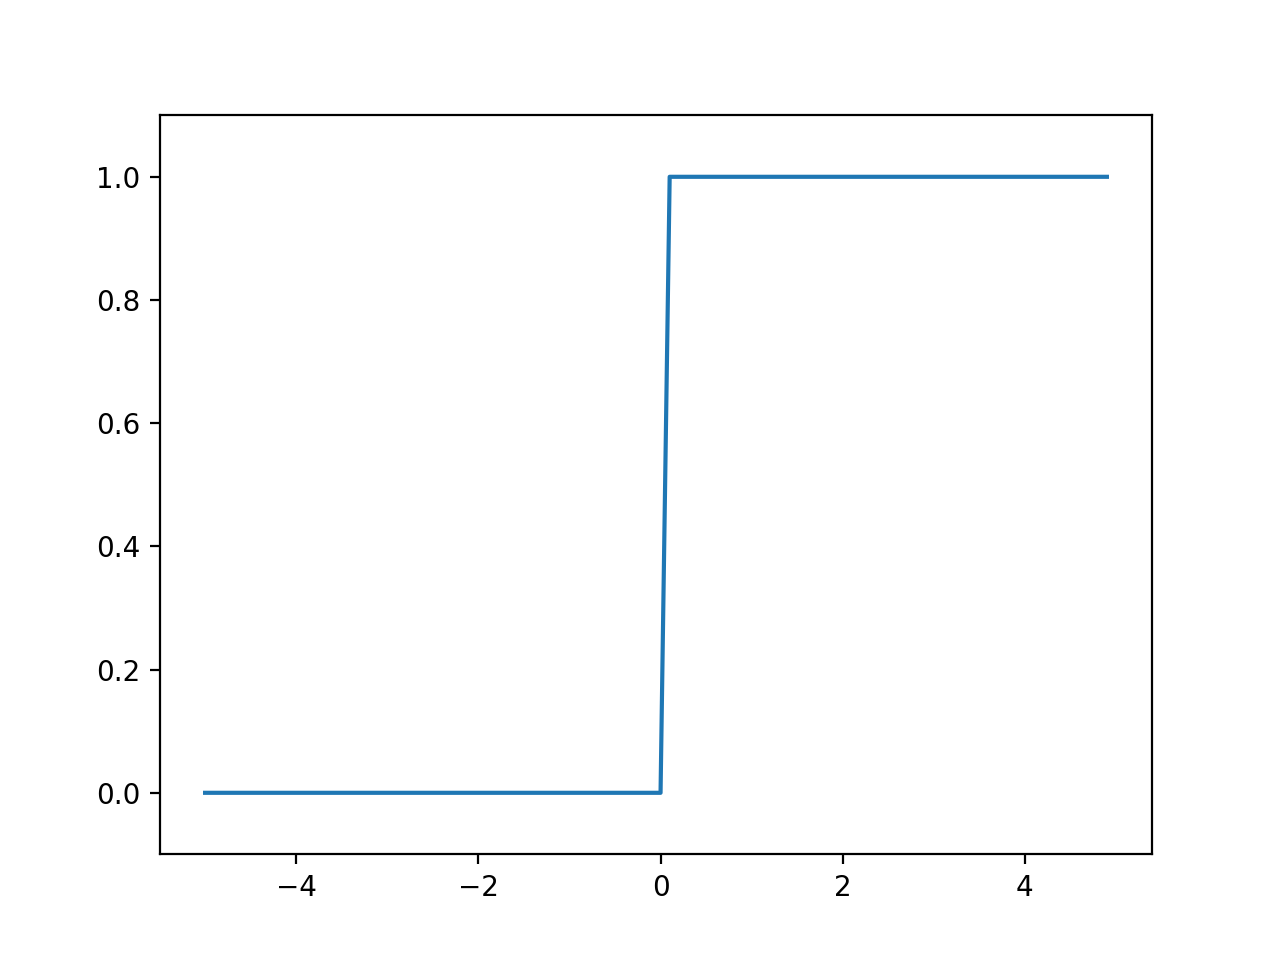

(-0.1, 1.1)

In [34]:
x=np.arange(-5.0,5.0,0.1)
y=step_function(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)

In [3]:
# sigmoid function
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [4]:
x=np.array([-1.,1.,2.])
sigmoid(x)

array([ 0.26894142,  0.73105858,  0.88079708])

<IPython.core.display.Javascript object>


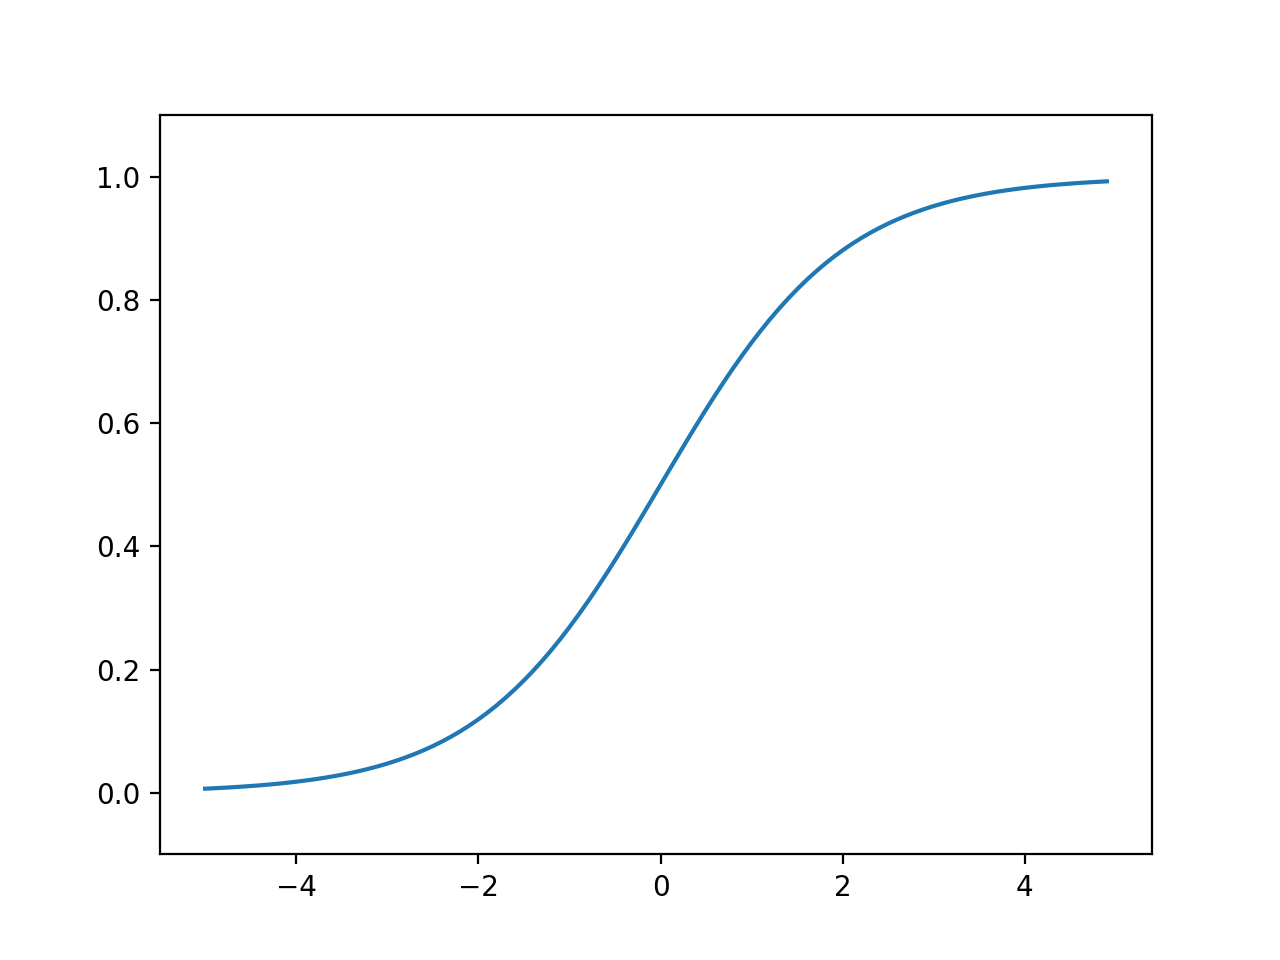

(-0.1, 1.1)

In [5]:
x=np.arange(-5.,5.,0.1)
y=sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)

시그모이드는 부드러운 곡선이며 입력에 따라 출력이 연속적으로 변한다. <br>
반면, 계단 함수는 0을 경계로 출력이 갑자기 바뀐다. <br>
시그모이드의 이 매끈함이 신경망 학습에서 아주 중요한 역할을 하게 된다. <br>
신경망에서 시그모이드 함수로 뉴런 사이에 연속적인 실수가 흐를 수 있게 한다.<br>

공통점으로 크게 보면 두 함수는 비슷한 모양, 입력이 작을 때 출력이 0에 가깝고 클때 출력이 1에 가까운 구조를 가진다. <br>
즉, 입력이 중요하면 큰값을 출력하고 입력이 중요하지 않으면 작은 값을 출력한다. 또한 출력은 항상 0에서 1사이 이다. <br>
중요한 공통점으로 둘다 비선형 함수라는 것이다. 선형 함수 사용시 신경망의 층을 깊게 하는 의미가 없어진다. <br>
예로 활성 함수 h(x)=cx 라 생각해보면 3층 이어도 y(x)=h(h(h(x)))=c^3*x 가 되어 무의미하게 된다. <br>
따라서 선형 함수를 이용해서는 다층의 이점을 살릴 수 없으므로 다층의 혜택을 얻고 싶다면 활성함수로 필히 비선형함수를 사용해야 한다. 

In [18]:
# ReLU function
def relu(x):
    return np.maximum(0,x)


최근에 자주 사용되는 활성 함수. 

In [6]:
def identity_function(x):
    return x

---
넘파이의 다차원 배열을 사용한 계산법을 숙달하면 신경망을 효율적으로 구현할 수 있다. 
<br>특히 np.dot 함수는 굉장히 유용하다.

In [7]:
# understanding of 3-layer NN
def init_network():
    network = {}
    network['W1']=np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
    network['b1']=np.array([0.1,0.2,0.3])
    network['W2']=np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
    network['b2']=np.array([0.1,0.2])
    network['W3']=np.array([[0.1,0.3],[0.2,0.4]])
    network['b3']=np.array([0.1,0.2])
    return network

def forward(network,x):
    W1,W2,W3=network['W1'],network['W2'],network['W3']
    b1,b2,b3=network['b1'],network['b2'],network['b3']
    
    a1=np.dot(x,W1)+b1
    z1=sigmoid(a1)
    a2=np.dot(z1,W2)+b2
    z2=sigmoid(a2)
    a3=np.dot(z2,W3)+b3
    y=identity_function(a3)
    return y

In [22]:
network=init_network()
x=np.array([1.0,0.5])
y=forward(network,x)
print(y)

[ 0.31682708  0.69627909]


출력층 설계<br>
신경망은 분류와 회귀 모두 이용할 수 있으며 어떤 문제냐에 따라 출력층에서 사용하는 활성 함수가 달라진다.<br>
일반적으로 회귀엔 항등 함수, 분류엔 소프트 맥스 함수를 사용한다.

In [8]:
# softmax function
def softmax(a):
    exp_a=np.exp(a)
    sum_exp_a=np.sum(exp_a)
    y=exp_a/sum_exp_a
    return y
a=np.array([0.3,2.9,4.0])
y=softmax(a)
print(y)

[ 0.01821127  0.24519181  0.73659691]


이 때 컴퓨터가 유한한 크기의 데이터를 다룬다는 특성 상 오버플로우 문제가 발생한다. 즉 너무 큰 값은 표현할 수 없다.<br> 
가령 e1000은 무한대이며 이런 큰값끼리 나눗셈 시 결과 수치가 '불안정'해진다.<br>
이런 문제를 해결하고자 소프트맥스의 지수 함수 계산시 임의의 정수를 더하거나 빼도 결과는 바뀌지 않는다는 성질을 이용한다. <br>
임의의 정수로 일반적인 것은 입력 신호 중 최댓값을 이용한다. 

In [9]:
# softmax function preventing overflow
def softmax(a):
    max_a=np.max(a)
    exp_a=np.exp(a-max_a)
    sum_exp_a=np.sum(exp_a)
    y=exp_a/sum_exp_a
    return y

In [27]:
a=np.array([0.3,2.9,4.0])
y=softmax(a)
print(y)
print(np.sum(y))

[ 0.01821127  0.24519181  0.73659691]
1.0


더하면 1이 되는 성질 때문에 소프트맥스 함수의 출력을 확률로 해석할 수 있다.<br>
즉 위의 결과는 74% 확률로 2번째 클래스, 25%의 확률로 1번째 클래스, 1%의 확률로 0번째 클래스라 얘기할 수 있다. <br>
소프트맥스 함수 적용시 각 원소의 대소 관계는 변하지 않는다. 이는 exp함수가 단조 증가 함수이기 때문이다. <br>
따라서 신경망을 이용한 classification 문제에서 소프트맥스 함수를 적용해도 출력이 가장 큰 뉴런의 위치는 달라지지 않는다. 즉 신경망으로 분류시 출력층의 소프트맥스 함수를 생략해도 된다. <br>
현업에서도 지수 함수 계산에 드는 자원낭비를 줄이고자 출력층의 소프트맥스 함수는 생략하는것이 일반적이다. <br>
추론 단계에서는 출력층의 소프트맥스 함수 생략하는 것이 일반적, 한편 학습 단계에서는 출력층에서 소프트맥스 함수를 사용한다.

---
MNIST 문제


In [10]:
import sys,os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

In [11]:
(x_train,t_train),(x_test,t_test)=load_mnist(flatten=True,normalize=False)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
(60000, 784)
(60000,)
(10000, 784)
(10000,)


flatten: 입력 이미지를 3차원 배열에서 1차원 배열로 저장<br>
normalize: 0~1 사이 값으로 정규화, false시 기존 0~255 값을 유지<br>
one_hot_label: false시 그냥 '7', '2' 같이 숫자 형태로 레이블 저장, true 시 one-hot encoding 형태로 저장

In [18]:
from PIL import Image

def img_show(img):
    pil_img=Image.fromarray(np.uint8(img))
    pil_img.show()
    
img=x_train[0]
label=t_train[0]
print(label)

print(img.shape)
img=img.reshape(28,28)
print(img.shape)

img_show(img)

5
(784,)
(28, 28)


In [29]:
import pickle
def get_data():
    (x_train,t_train),(x_test,t_test)=load_mnist(normalize=True,flatten=True,one_hot_label=False)
    return x_test,t_test
def init_network():
    with open("./dataset/sample_weight.pkl",'rb') as f:
        network=pickle.load(f)
    return network
def predict(network,x):
    W1,W2,W3=network['W1'],network['W2'],network['W3']
    b1,b2,b3=network['b1'],network['b2'],network['b3']
    
    a1=np.dot(x,W1)+b1
    z1=sigmoid(a1)
    a2=np.dot(z1,W2)+b2
    z2=sigmoid(a2)
    a3=np.dot(z2,W3)+b3
    y=sigmoid(a3)
    return y

In [25]:
x,t=get_data()
network=init_network()

accuracy_cnt=0
for i in range(len(x)):
    y=predict(network,x[i])
    p=np.argmax(y)
    if p==t[i]:
        accuracy_cnt+=1
print("Accuracy: "+str(float(accuracy_cnt)/len(x)))

Accuracy: 0.9352


앞의 예시에서는 전처리 과정 중 하나로 normalization을 진행.<br>
단순히 각 픽셀값을 255로 나누는 정규화를 수행. <br>
현업에서는 데이터 전체 분포를 고려해 전처리하는 경우가 많다. 예를 들어 평균과 표준편차를 이용해 데이터들이 0을 중심으로 분포하도록 할 수 있다. <br>
이 외 전체 데이터를 균일하게 분포시키는 데이터 whitening 등도 있다. 

---
데이터 샘플 하나씩 입력하는 경우가 아니라 여러 샘플들을 한꺼번에 입력하는 것을 배치 처리라 한다. <br>
이는 컴퓨터 계산시 큰 이점을 준다. 이미지 1장당 처리 시간을 대폭 줄여준다.<br>
이유는 1.수치 계산 라이브러리 대부분 큰 배열을 효율적으로 처리할 수 있도록 고도로 최적화되어 있기 때문이다. <br>
2.커다란 신경망에서는 데이터 전송이 병목으로 작용하는 경우가 자주 있는데, 배치 처리를 통해 버스에 주는 부하를 줄일 수 있기 때문이다. 정확히는 느린 I/O를 통해 데이터를 읽는 횟수가 줄어, 빠른 CPU/GPU 로 순수 계산을 수행하는 비율이 높아진다.<br>
즉 배치 처리로 큰 배열로 이뤄진 계산을 하게 되는데, 컴퓨터에서는 큰 배열을 한꺼번에 계산하는 것이 분할된 작은 배열을 여러 번 계산하는 것보다 빠르다. 


In [41]:
x,t=get_data()
network=init_network()

batch_size=100
accuracy_cnt=0

for i in range(0,len(x),batch_size):
    x_batch=x[i:i+batch_size]
    y_batch=predict(network,x_batch)
    p=np.argmax(y_batch,axis=1)
    accuracy_cnt+=np.sum(p==t[i:i+batch_size])

print("Accuracy: "+str(float(accuracy_cnt)/len(x)))

Accuracy: 0.9352
